<a href="https://colab.research.google.com/github/BureddySaiPoojitha/AIML_Module05_ALL_Labs_-/blob/main/Module5_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student Training Program AIML**

# REGRESSION LAB 2 : LOSS FUNCTIONS

# Motivation

The main goal of machine learning tasks is to "learn" something about data we feed to our models. But how does the model actually learn anything? To understand this, we need to first understand what objective functions are.

Mathematically, objective functions are a function whose values we desire to minimize/maximize. In the context of machine learning, the objective is commonly referred to as a loss function. Loss functions indicate how well the model is doing on the dataset.

The value of the objective function is simply called loss. Our goal is to eventually find the best model parameters that has the least average loss on the data after training.

We are familiar with the idea of error from the linear regression lab. RMSE is a common loss function used in machine learning. However, there are many other loss functions employed, depending on what the task is (classification, regression etc.). In this lab, we will take a look at some common loss functions, and understand why they are used where they are.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


# 1. Regression

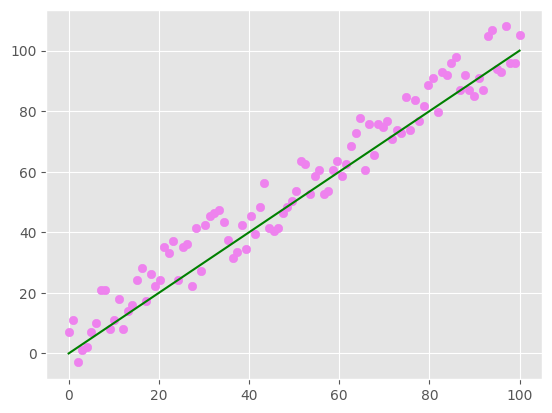

In [3]:
np.random.seed(0)
x=np.linspace(0,100,100)
y_actual=np.copy(x)
y_pred=x+np.random.randint(-5,15,100)
plt.plot(x,y_actual,color="green")
plt.scatter(x,y_pred,color="violet")
plt.show()

### **Mean Squared Error**

In [4]:
mse=np.mean((y_actual-y_pred)**2)
print("MSE is :{}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is :52.48
RMSE is: 7.244308110509933


### **Mean Absolute Error**

In [5]:
mae=np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.82


# **2. Classification**

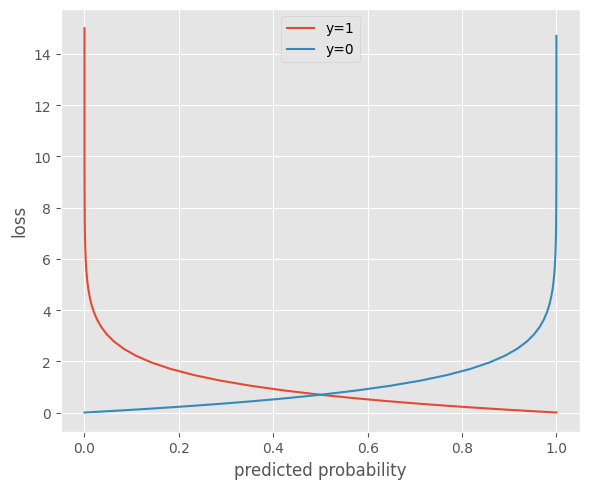

In [6]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-15, 15, 0.3)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(6,5))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**KNN-regression**

In [7]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [8]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"
train = pd.read_csv(train_path)

In [9]:
def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)
  if 'Outlet_Size' in df.columns:
    mode_size = df['Outlet_Size'].mode()[0]
    df['Outlet_Size'].fillna(mode_size,inplace=True)
  else:
    # Handle the case where the column is missing
    print("Warning: 'Outlet_Size' column not found in the DataFrame.")
    # You can choose to skip this step or handle it differently

  # Check if columns exist before dropping
  columns_to_drop = ['Item_Identifier', 'Outlet_Identifier']
  for column in columns_to_drop:
    if column in df.columns:
      df.drop([column], axis=1, inplace=True)
    else:
      print(f"Warning: Column '{column}' not found in DataFrame, skipping drop.")

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

<ipython-input-9-a8a5ad7a9350>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(mean_weight,inplace=True)
<ipython-input-9-a8a5ad7a9350>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,True,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [10]:
train , test = train_test_split(train, test_size = 0.2)
x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']
x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [11]:
scaler = MinMaxScaler(feature_range=(0, 2))
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [12]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)
    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

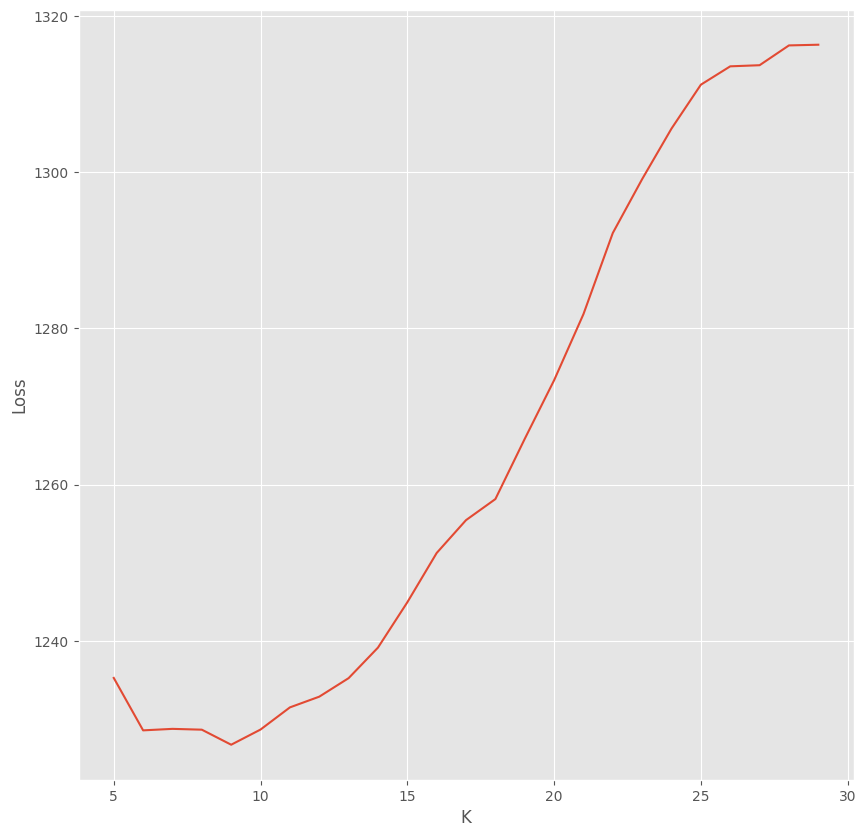

Minimum error 1226.6888571439922 is at k = 4


In [13]:
rmse_val = []
for k in range(5,30):
  knn_regression(k,x_train,y_train,x_test,y_test)
figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(5,30),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

**Exercise**

1.  Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.

In [16]:
!pip install scikit-learn  # Install scikit-learn if you haven't already
from sklearn.datasets import make_regression # Import the make_regression function
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


MSE: 437.54985402070196
MAE: 16.040541887491848
Huber Loss: 15.558707106181174
Log-Cosh Loss: 15.381017868319208


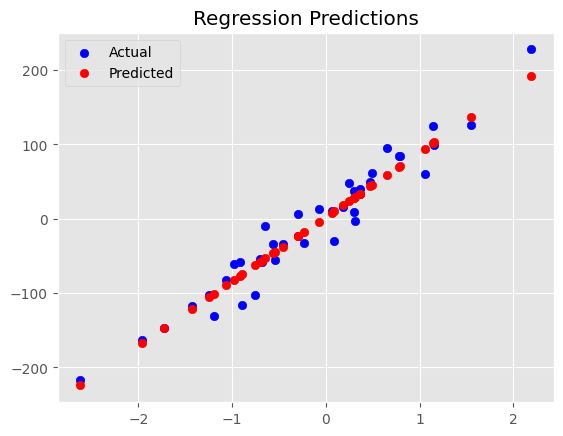

In [17]:
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Loss calculations
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
huber_loss = np.mean(np.where(np.abs(y_test - y_pred) <= 1,
                               0.5 * (y_test - y_pred)**2,
                               np.abs(y_test - y_pred) - 0.5))

log_cosh_loss = np.mean(np.log(np.cosh(y_test - y_pred)))

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"Huber Loss: {huber_loss}")
print(f"Log-Cosh Loss: {log_cosh_loss}")

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Regression Predictions')
plt.legend()
plt.show()


2.  Explore other loss functions and try to understand when and why they are used.

In [18]:
# Quantile Loss Example
def quantile_loss(y_true, y_pred, q):
    error = y_true - y_pred
    return np.mean(np.maximum(q * error, (q - 1) * error))

# Example with synthetic data
q = 0.9  # Predict the 90th percentile
quantile_loss_value = quantile_loss(y_test, y_pred, q)
print(f"Quantile Loss (q={q}): {quantile_loss_value}")


Quantile Loss (q=0.9): 8.802656653815529


3.   Try out KNN-regression on other datasets see which values of K give the best results.

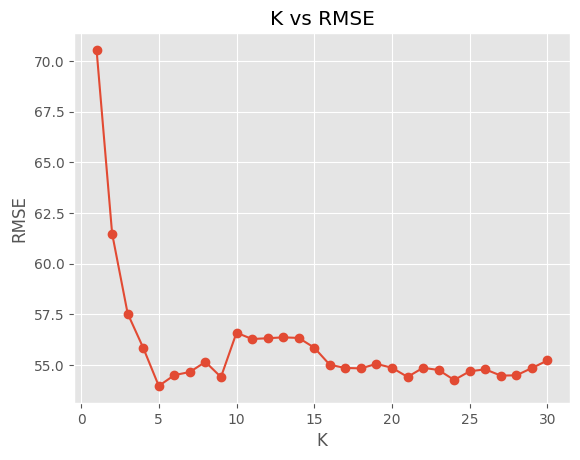

Optimal K: 5, RMSE: 53.96451601528587


In [20]:
data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN Regression
rmse_values = []
for k in range(1, 31):
    model = neighbors.KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)

# Plot RMSE vs K
plt.plot(range(1, 31), rmse_values, marker='o')
plt.title('K vs RMSE')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

# Print optimal K
optimal_k = np.argmin(rmse_values) + 1
print(f"Optimal K: {optimal_k}, RMSE: {min(rmse_values)}")


4.   Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.

RMSE with K=1: 70.54204260780162
RMSE with K=size of dataset: 73.22249283682244


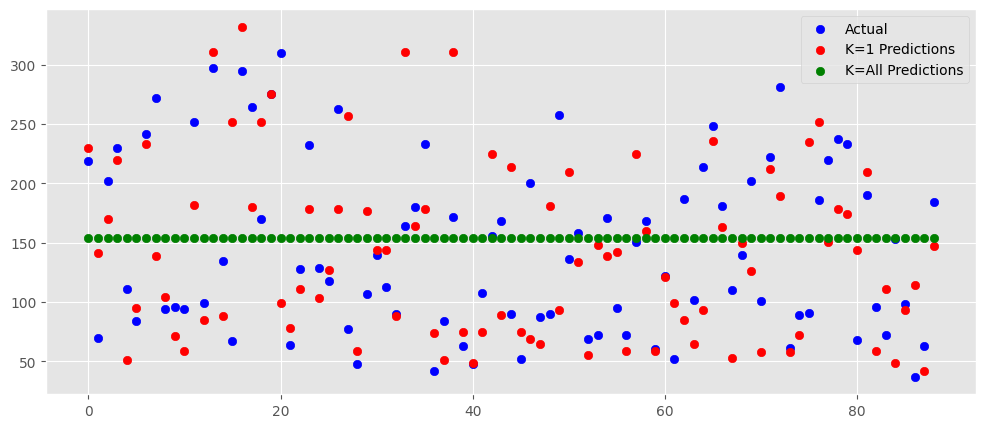

In [21]:
model_k1 = neighbors.KNeighborsRegressor(n_neighbors=1)
model_k1.fit(X_train, y_train)
y_pred_k1 = model_k1.predict(X_test)

model_k_all = neighbors.KNeighborsRegressor(n_neighbors=X_train.shape[0])
model_k_all.fit(X_train, y_train)
y_pred_k_all = model_k_all.predict(X_test)

# RMSE for extreme K values
rmse_k1 = sqrt(mean_squared_error(y_test, y_pred_k1))
rmse_k_all = sqrt(mean_squared_error(y_test, y_pred_k_all))

print(f"RMSE with K=1: {rmse_k1}")
print(f"RMSE with K=size of dataset: {rmse_k_all}")

# Visualize predictions
plt.figure(figsize=(12, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_k1)), y_pred_k1, color='red', label='K=1 Predictions')
plt.scatter(range(len(y_pred_k_all)), y_pred_k_all, color='green', label='K=All Predictions')
plt.legend()
plt.show()
